In [ ]:
import pandas as pd

In [ ]:
# Assuming the dataset is in a CSV file named 'online_retail.csv'
df = pd.read_excel('/content/Online Retail.xlsx')

## 1. Examine the Structure of the Dataset and Understand Attribute Meaning

In [ ]:
# Display first few rows to understand structure and attribute meaning
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
# Check column names and data types
print(df.columns)
print(df.dtypes)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


## 2. Identify Missing Values, Outliers, and Other Issues

In [ ]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Identify outliers in Quantity and UnitPrice columns
import matplotlib.pyplot as plt
import seaborn as sns

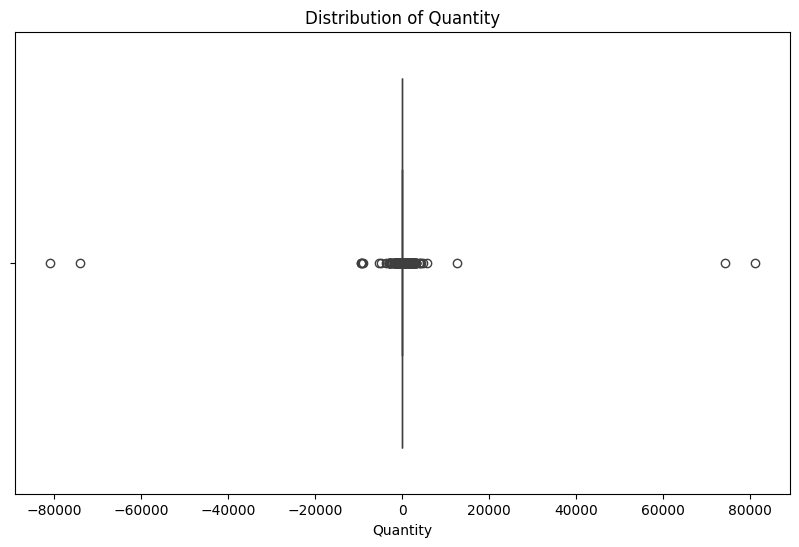

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Distribution of Quantity')
plt.show()

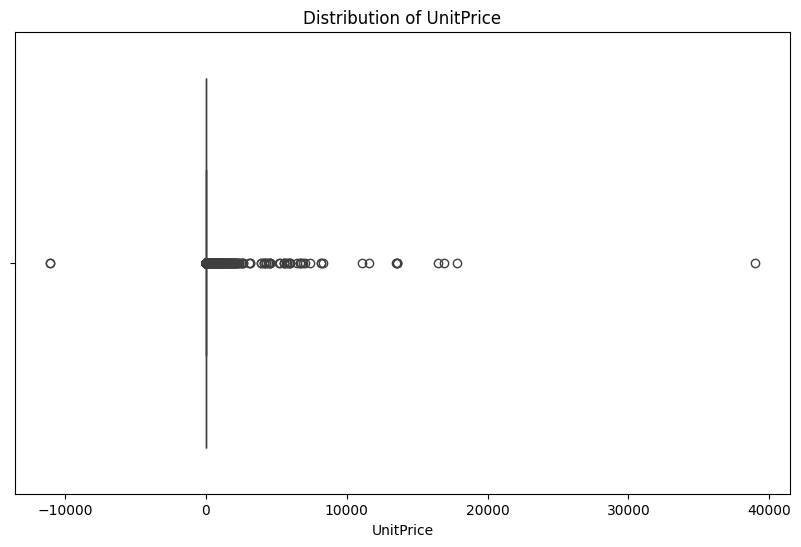

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Distribution of UnitPrice')
plt.show()

## a. Most Popular Product Categories

In [ ]:
# Calculate total revenue per product category
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
revenue_per_category = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

In [ ]:
# Calculate number of orders per product category
orders_per_category = df['Description'].value_counts().sort_values(ascending=False)

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Total Revenue')

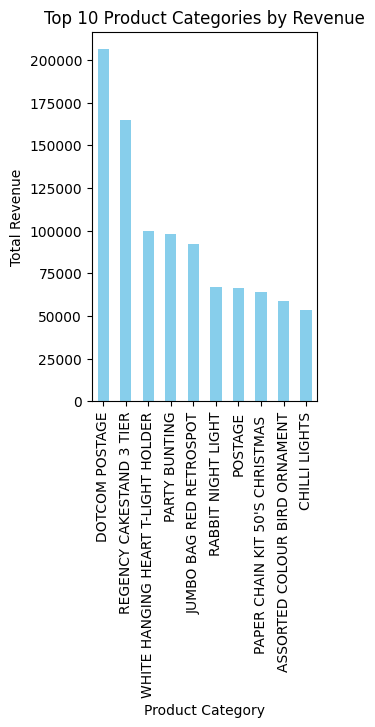

In [ ]:
# Top 10 product categories by revenue
plt.subplot(1, 2, 1)
revenue_per_category.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

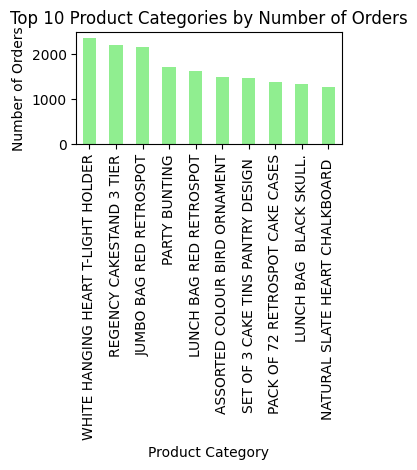

In [ ]:
# Top 10 product categories by number of orders
plt.subplot(1, 2, 2)
orders_per_category.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Product Categories by Number of Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

## b. Seasonal Trends in Customer Purchasing Behavior

In [ ]:
# Convert InvoiceDate to datetime format and extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
# Group by month and calculate total revenue
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

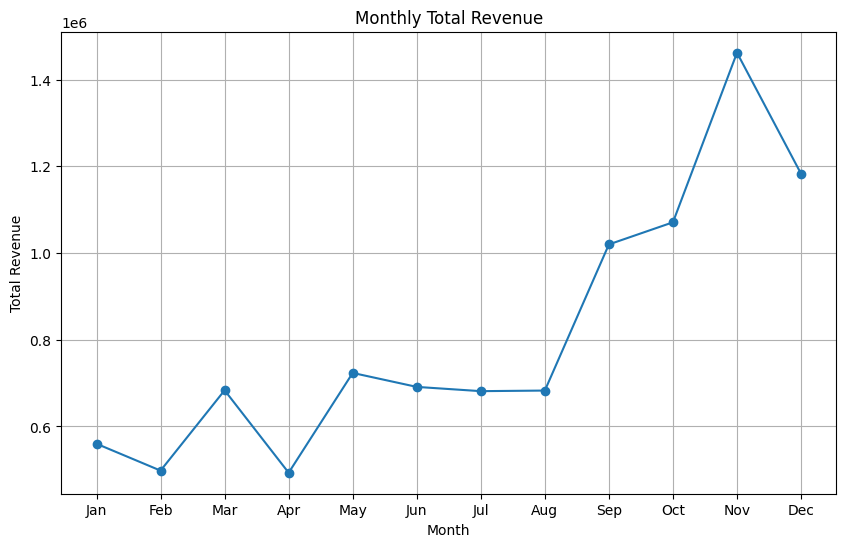

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## c. Correlation between Quantity Ordered and Unit Price

In [ ]:
# Calculate correlation coefficient
correlation = df['Quantity'].corr(df['UnitPrice'])

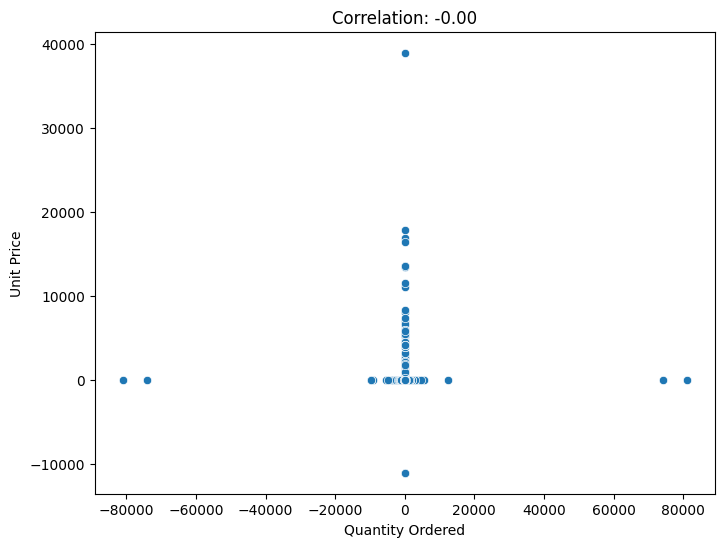

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Quantity Ordered')
plt.ylabel('Unit Price')
plt.show()

## d. Differences in Customer Spending based on Demographic Attributes

In [ ]:
# Group by CustomerID and calculate total spending
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

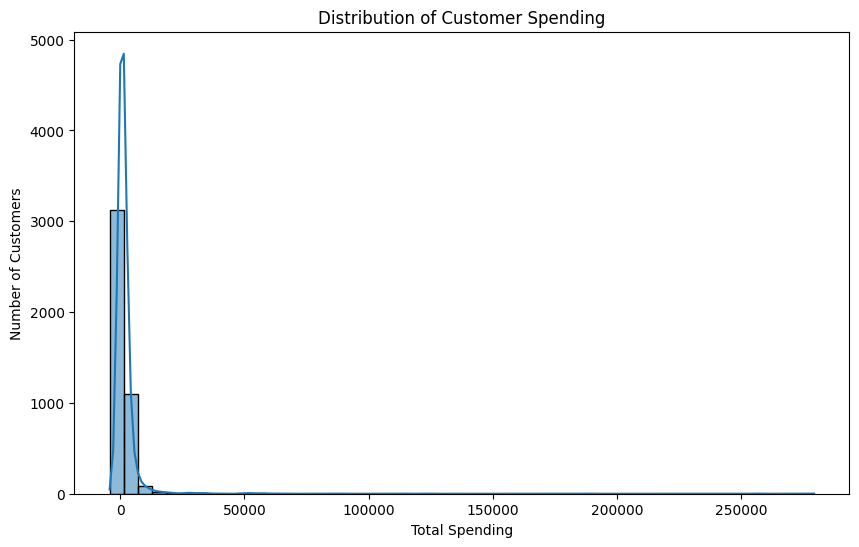

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=50, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

## 3. Visualize the dataset

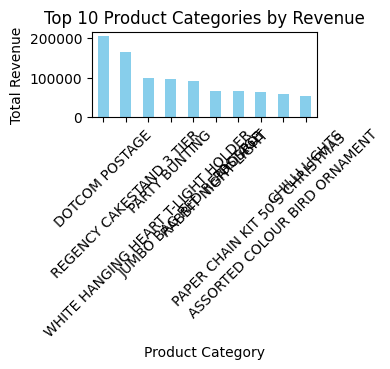

In [ ]:
# Example 1: Bar chart - Top 10 product categories by revenue
plt.subplot(2, 2, 1)
top_categories_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_categories_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

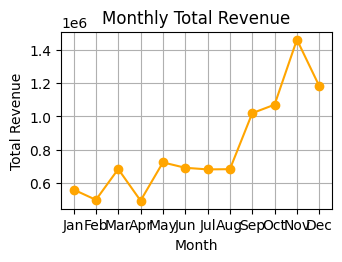

In [ ]:
# Example 2: Line chart - Monthly total revenue
plt.subplot(2, 2, 2)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='orange')
plt.title('Monthly Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

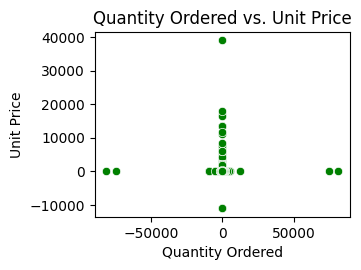

In [ ]:
# Example 3: Scatter plot - Quantity ordered vs. Unit price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, color='green')
plt.title('Quantity Ordered vs. Unit Price')
plt.xlabel('Quantity Ordered')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

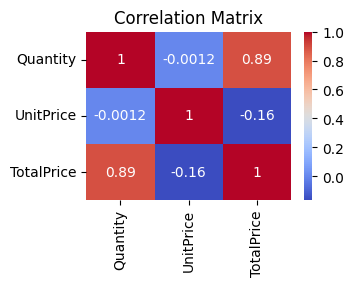

In [ ]:
# Example 4: Heatmap - Correlation matrix
plt.subplot(2, 2, 4)
corr_matrix = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()